# Import Statements

In [1]:
import os
import logging
logging.basicConfig(level=logging.INFO)
import warnings
warnings.filterwarnings('ignore')

import geodata
import xarray as xr
import pandas as pd
import numpy as np
import pickle

from shapely.geometry import shape
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
import statsmodels.api as sm
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import geoplot
import plotly.express as px
import mapclassify

# District Level Datasets

In [ ]:
district_emp = pd.read_csv('district_emp_data_full.csv')
district_emp = district_emp[['State/UT Name', 'District Name', 'Total Coal mining jobs (Direct + Indirect Jobs)', 
                             'Total Power plant  jobs (Direct + Indirect Jobs)', 'Total Coal Jobs (Direct + Indirect)', 
                             'Total Pensioners ', 'DMF USD (in Million $)', 'CSR  USD (in Million $)', 
                             'Mining CSR (in lakhs)', 'CSR Power Plant CSR (in lakhs)']]

district_emp.columns = ['State Name', 'District Name', 'Total Coal Mining Jobs', 
                             'Total Power Plant Jobs', 'Total Coal Jobs', 
                             'Total Pensioners', 'DMF USD', 'CSR USD', 
                             'Mining CSR INR', 'CSR Power Plant CSR INR'] # in million $, and lakh

district_emp = district_emp[district_emp['District Name'].isin([
    'Warangal Rural'
]) == False]

district_emp = district_emp.replace({
    'Aurangabad (Maha)': 'Aurangabad',
    'Bhadradri Kothagudem': 'Bhadradri',
    'Gondia': 'Gondiya',
    'Janjgir Champa': 'Janjgir-Champa',
    'Jayashankar Bhoopalpally': 'Jayashankar',
    'Korea': 'Koriya',
    'Kushi nagar': 'Kushinagar',
    'Lakhimpur Kheri': 'Lakhimpur',
    'Malda': 'Maldah',
    'Sahebganj': 'Sahibganj',
    'Sundergarh': 'Sundargarh',
    'Thoothukudi': 'Thoothukkudi',
    'Warangal Urban': 'Warangal',
    'Bangalore Urban': 'Bangalore',
    'Kutch': 'Kachchh',
    'Purulia': 'Puruliya',
    'Raigad': 'Raigarh',
    'Seraikela Kharsawan': 'Saraikela-Kharsawan',
    'South 24 Parganas': 'South Twenty Four Parganas',
    'North 24 Parganas': 'North Twenty Four Parganas',
    'Tiruvallur': 'Thiruvallur'
})

In [ ]:
district_dem = gpd.read_file('output.shp')[['statename', 'distname', 'st_areasha', 'distarea', 'totalpopul', 'geometry']]
district_dem.columns = ['State Name', 'District Name', 'State Area', 'District Area', 'Population', 'Geometry']

district_dem = district_dem[district_dem['District Name'].isin([
    'Imphal East', 'Warangal (R)'
]) == False]

district_dem = district_dem.replace({
    'NCT of Delhi': 'Delhi', 
    'Orissa': 'Odisha',
    'Ahmadabad': 'Ahmedabad',
    'Anugul': 'Angul',
    'Banas Kantha': 'Banaskantha',
    'Bara Banki': 'Barabanki',
    'Barddhaman': 'Bardhaman Purb',
    'Bid': 'Beed',
    'Buldana': 'Buldhana',
    'Chhatisgarh': 'Chhattisgarh',
    'Chittaurgarh': 'Chittorgarh',
    'Daman': 'Daman & Diu',
    'Diu': 'Daman & Diu',
    'Darjiling': 'Darjeeling',
    'Central': 'Central Delhi', 
    'East': 'East Delhi', 
    'West': 'West Delhi',
    'North': 'North Delhi', 
    'North East': 'North East Delhi',
    'North West': 'North West Delhi',
    'South': 'South Delhi',
    'South West': 'South West Delhi',
    'Gurgaon': 'Gurugram',
    'Hydrabad': 'Hyderabad',
    'Imphal West': 'Inner Manipur',
    'Jagatsinghapur':'Jagatsinghpur',
    'Jalor': 'Jalore',
    'Jhunjhunun': 'Jhunjhunu',
    'Kadapa(YSR)': 'Kadapa',
    'Kaimur (Bhabua)': 'Kaimur',
    'Kamrup Metropolitan': 'Kamrup',
    'Khandwa (East Nimar)': 'Khandwa',
    'Khargone (West Nimar)': 'Khargone',
    'Kodarma': 'Koderma',
    'Purulia': 'Puruliya',
    'Rae Bareli': 'Raebareli',
    'Sabar Kantha': 'Sabarkantha',
    'Warangal (U)': 'Warangal',
    'Hugli': 'Hooghly',
    'Mahrajganj': 'Maharajganj',
    'Bhiwani': 'Bhiwandi'
})

In [ ]:
district_votes = pd.read_csv('district_vote_data.csv')[['State', 'PC Name', 'Party', 'Margin %']]
district_votes.columns = ['State Name', 'District Name', 'Winning Party', 'Margin %']

district_votes = district_votes[district_votes['District Name'].isin([
    'Ahmedabad East', 'Arunachal East', 'Chennai South', 'Chennai North', 'Kolkata Dakshi', 'Maldaha Dakshi'
    'Mumbai North Central', 'Mumbai North East', 'Mumbai North West', 'Mumbai South Central'
]) == False]

district_votes = district_votes.replace({
    'Andhra Pradesh [2014 Onwards]': 'Andhra Pradesh', 
    'Bihar [2000 Onwards]': 'Bihar',
    'Delhi [1977 Onwards]': 'Delhi',
    'Madhya Pradesh [2000 Onwards]': 'Madhya Pradesh',
    'Uttar Pradesh [2000 Onwards]': 'Uttar Pradesh',
    'Orissa': 'Odisha',
    'Ahmedabad West': 'Ahmedabad',
    'Arunachal West': 'Arunachal',
    'Andaman And Nicobar Islands': 'Andaman & Nicobar Islands',
    'Bangalore Rura': 'Bangalore Rural',
    'Baramulla': 'Baramula',
    'Bhandara - Gon': 'Bhandara',
    'Bhiwani-Mahend': 'Bhiwani',
    'Chennai Centra': 'Chennai',
    'Chikkballapur': 'Chikkaballapura',
    'Dadra And Nagar Haveli': 'Dadra & Nagar Haveli',
    'Dakshina Kanna': 'Dakshina Kannada',
    'Daman And Diu': 'Daman & Diu',
    'Fatehgarh Sahi': 'Fatehgarh Sahib',
    'Gadchiroli-Chi': 'Gadchiroli',
    'Gautam Buddh N': 'Gautam Buddh Nagar',
    'Gurgaon': 'Gurugram',
    'Jaipur Rural': 'Jaipur',
    'Jajpur': 'Jajapur',
    'Jhalawar-Baran': 'Jhalawar',
    'Karauli-Dholpu': 'Karauli',
    'Kodarma': 'Koderma',
    'Kolkata Uttar': 'Kolkata',
    'Kushi Nagar': 'Kushinagar',
    'Maldaha Uttar': 'Maldaha',
    'Malkajgiri': 'Malkangiri',
    'Mandsour': 'Mandsaur',
    'Mumbai North': 'Mumbai Suburban',
    'Mumbai South': 'Mumbai',
    'Nabarangapur': 'Nabarangpur',
    'Nainital-Udham': 'Nainital',
    'Palamau': 'Palamu',
    'Patna Sahib': 'Patna',
    'Peddapalle': 'Peddapalli',
    'Ratnagiri - Si': 'Ratnagiri',
    'Sant Kabir Nag': 'Sant Kabir Nagar',
    'Thiruvananthap': 'Thiruvananthapuram',
    'Tiruchirappall': 'Tiruchirappalli',
    'Tonk-Sawai Mad': 'Tonk',
    'Udupi Chikmaga':'Udupi',
    'Yavatmal-Washi': 'Yavatmal'
})

district_votes['Margin %'] = district_votes['Margin %'].apply(lambda x: float(x.replace('%', '')))

In [ ]:
districts = district_dem.merge(district_emp, on=['State Name', 'District Name'], how='left')
districts = districts.merge(district_votes, on=['State Name', 'District Name'], how='left')
districts['Coal Job %'] = districts['Total Coal Jobs'] / districts['Population']
districts['Coal Pensioners %'] = districts['Total Pensioners'] / districts['Population']
districts.info()

In [ ]:
# export to pickle
filehandler = open("districts.pickle","wb")
pickle.dump(districts, filehandler)
filehandler.close()

### Explore Name Mismatches

In [ ]:
states_dem = set(np.unique(district_dem['State Name'].fillna('')))
states_emp = set(np.unique(district_emp['State Name'].fillna('')))
states_votes = set(np.unique(district_votes['State Name'].fillna('')))

district_dem_districts = set(np.unique(district_dem['District Name'].fillna('')))
district_emp_districts = set(np.unique(district_emp['District Name'].fillna('')))
district_votes_districts = set(np.unique(district_votes['District Name'].fillna('')))

In [ ]:
# States Missing Employment Data
states_dem - states_emp

In [ ]:
# Employment Data District Not Found
district_emp_districts - district_dem_districts

In [ ]:
# Districts Missing Employment Data
district_dem_districts - district_emp_districts

### Visualize District Data

In [2]:
os.chdir('../data/pickle')
# district data
file = open("districts.pickle",'rb')
districts = pickle.load(file)
file.close()
# ranked district data
file = open("JPCD_sum.pickle",'rb')
JPCD_sum = pickle.load(file)
file.close()
file = open("polygons.pickle","rb")
polygons = pickle.load(file)
file.close()

In [3]:
def return_incumbency(x):
    if x == 3:
        return "High"
    elif x in [2,1]:
        return "Medium"
    else:
        return "Low"

JPCD_sum['Coal Incumbency'] = JPCD_sum['Rank'].apply(return_incumbency)

In [8]:
JPCD_sum

,State Name,District Name,Geometry,J,P,C,D,Score,Rank,Coal Incumbency
0,Uttarakhand,Nainital,"POLYGON ((79.52659 29.05543, 79.52550 29.05545...",2.0,0.0,0.000000,0.0,2.000000,2,Medium
1,Uttarakhand,Dehradun,"POLYGON ((77.87557 30.26052, 77.87467 30.26087...",0.0,1.0,0.333333,0.0,1.333333,1,Medium
2,Uttarakhand,Almora,"POLYGON ((79.28494 29.92735, 79.28495 29.92723...",NaN,NaN,NaN,NaN,0.000000,0,Low
3,Uttarakhand,Champawat,"POLYGON ((80.12479 29.01308, 80.12481 29.01306...",NaN,NaN,NaN,NaN,0.000000,0,Low
4,Uttarakhand,Uttarkashi,"POLYGON ((78.92267 31.25333, 78.93106 31.26840...",NaN,NaN,NaN,NaN,0.000000,0,Low
...,...,...,...,...,...,...,...,...,...,...
687,Telangana,Wanaparthy,"POLYGON ((78.23115 16.43789, 78.23471 16.38793...",NaN,NaN,NaN,NaN,0.000000,0,Low
688,Telangana,Vikarabad,"POLYGON ((77.41953 17.12279, 77.41852 17.12334...",NaN,NaN,NaN,NaN,0.000000,0,Low
689,Telangana,Mahabubnagar,"POLYGON ((77.49606 16.38155, 77.49382 16.38188...",NaN,NaN,NaN,NaN,0.000000,0,Low
690,Ladakh,Kargil,"POLYGON ((76.13869 34.63398, 76.13957 34.63408...",NaN,NaN,NaN,NaN,0.000000,0,Low


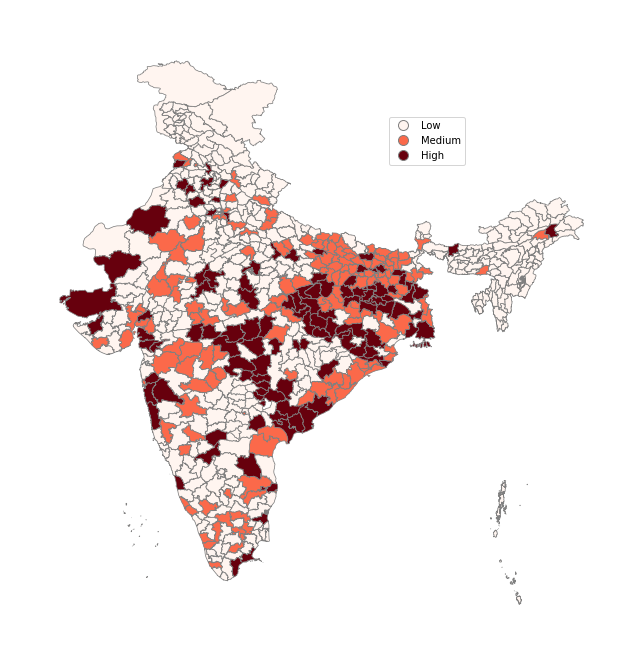

In [20]:
os.chdir('../../outputs/plots')
scheme = mapclassify.UserDefined(JPCD_sum['Rank'], bins=[0, 2, 3])

fig = geoplot.choropleth(
    gpd.GeoSeries(JPCD_sum['Geometry']), 
    hue=JPCD_sum['Rank'],
    figsize=(12, 12), 
    scheme=scheme,
    legend=True,
    legend_labels=['Low', 'Medium', 'High'],
    legend_kwargs={'bbox_to_anchor': (0.6, 0.75), 'frameon': True},
    edgecolor='gray',
    linewidth=0.75,
    cmap='Reds',
)

fig = fig.get_figure()
fig.savefig('district_incumbency_distribution')

In [ ]:
geoplot.choropleth(
    gpd.GeoSeries(districts['Geometry']), 
    hue=districts['Total Coal Jobs'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75
)

plt.title('Total Coal Jobs (Direct + Indirect)')
plt.show()

geoplot.choropleth(
    gpd.GeoSeries(districts['Geometry']), 
    hue=districts['Total Pensioners'], 
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75
)

plt.title('Total Pensioners')
plt.show()

geoplot.choropleth(
    gpd.GeoSeries(districts['Geometry']), 
    hue=districts['DMF USD'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75
)

plt.title('DMF USD (in Million $)')
plt.show()

geoplot.choropleth(
    gpd.GeoSeries(districts['Geometry']), 
    hue=districts['CSR USD'], 
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75
)

plt.title('CSR USD (in Million $)')
plt.show()

geoplot.choropleth(
    gpd.GeoSeries(districts['Geometry']), 
    hue= districts['Winning Party'].fillna(''),
#     scheme=districts['Margin %'], 
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75
)

plt.title('Winning Party')
plt.show()

# Targets

In [ ]:
wind_t_30 = {}
wind_t_30['Gujarat'] = 13.677
wind_t_30['Jammu and Kashmir'] = 0
wind_t_30['Arunachal Pradesh'] = 0
wind_t_30['West Bengal'] = 3.0
wind_t_30['Sikkim'] = 0
wind_t_30['Uttaranchal'] = 0
wind_t_30['Uttar Pradesh'] = 4.781
wind_t_30['Uttarakhand'] = 0.860
wind_t_30['Bihar'] = 3.0
wind_t_30['Jharkhand'] = 4.938
wind_t_30['Nagaland'] = 0
wind_t_30['Manipur'] = 0
wind_t_30['Mizoram'] = 0
wind_t_30['Tripura'] = 0
wind_t_30['Meghalaya'] = 0
wind_t_30['Punjab'] = 2.0
wind_t_30['Rajasthan'] = 13.130
wind_t_30['Himachal Pradesh'] = 0
wind_t_30['Andhra Pradesh'] = 8.000
wind_t_30['Daman and Diu'] = 0
wind_t_30['Maharashtra'] = 11.410
wind_t_30['Goa'] = 0.002
wind_t_30['Karnataka'] = 15.416
wind_t_30['Kerala'] = 0.788
wind_t_30['Puducherry'] = 0
wind_t_30['Tamil Nadu'] = 13.796
wind_t_30['Lakshadweep'] = 0
wind_t_30['Andaman and Nicobar Islands'] = 0
wind_t_30['Delhi'] = 0.096
wind_t_30['Dadra and Nagar Haveli'] = 0
wind_t_30['Chandigarh'] = 0
wind_t_30['Madhya Pradesh'] = 12.474
wind_t_30['Chhattisgarh'] = 5.171
wind_t_30['Haryana'] = 5.220
wind_t_30['Telangana'] = 8.482
wind_t_30['Odisha'] = 2.660
wind_t_30['Assam'] = 0

solar_t_30 = {}
solar_t_30['Jammu and Kashmir'] = 1.546
solar_t_30['Punjab'] = 6.0
solar_t_30['Haryana'] = 5.040
solar_t_30['Rajasthan'] = 18.042
solar_t_30['Delhi'] = 0.875
solar_t_30['Chandigarh'] = 0
solar_t_30['Himachal Pradesh'] = 0.500
solar_t_30['Uttar Pradesh'] = 11.500
solar_t_30['Uttarakhand'] = 4.0

solar_t_30['Goa'] = 1.025
solar_t_30['Gujarat'] = 14.26
solar_t_30['Madhya Pradesh'] = 12.923
solar_t_30['Chhattisgarh'] = 9.483
solar_t_30['Maharashtra'] = 12.506
solar_t_30['Daman and Diu'] = 0
solar_t_30['Dadra and Nagar Haveli'] = 0

solar_t_30['Andhra Pradesh'] = 8.1
solar_t_30['Telangana'] = 12.971
solar_t_30['Karnataka'] = 13.338
solar_t_30['Kerala'] = 2.625
solar_t_30['Tamil Nadu'] = 18.449
solar_t_30['Puducherry'] = 0

solar_t_30['Bihar'] = 10.431
solar_t_30['Jharkhand'] = 5.277
solar_t_30['Odisha'] = 10.971
solar_t_30['West Bengal'] = 8.077
solar_t_30['Sikkim'] = 0

solar_t_30['Assam'] = 0
solar_t_30['Manipur'] = 0
solar_t_30['Meghalaya'] = 0
solar_t_30['Nagaland'] = 0
solar_t_30['Mizoram'] = 0
solar_t_30['Tripura'] = 0
solar_t_30['Arunachal Pradesh'] = 6.870

solar_t_30['Lakshadweep'] = 0
solar_t_30['Andaman and Nicobar Islands'] = 0